# I. Visualisations des données de tests dataset_9



In [1]:
#import de tous les bibliothéques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Charger le dataset
file_path = "dataset.csv"  # Remplacez par le chemin de votre fichier
#df = pd.read_csv(file_path, names=columns, skiprows=1)
df_test_9= pd.read_csv('dataset.csv.xls')
df_train_3 = pd.read_csv('train_10.txt')
df_test_9.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/17 11:34:49.436881,1823.088379,udp,46.196.43.16,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2.0,214.0,107.0,flow=Background-UDP-Established
1,2011/08/17 11:39:01.485380,2005.431641,udp,82.1.195.156,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2.0,214.0,107.0,flow=Background-UDP-Established
2,2011/08/17 11:40:19.495285,1973.646729,udp,151.28.221.122,6881,<->,147.32.84.118,6881,CON,0.0,0.0,2.0,214.0,107.0,flow=Background-UDP-Established
3,2011/08/17 12:01:01.780520,3599.997803,udp,188.75.133.98,16200,<->,147.32.86.125,35248,CON,0.0,0.0,409227.0,207547419.0,182657149.0,flow=Background-UDP-Established
4,2011/08/17 12:01:01.782109,2059.387451,tcp,119.252.172.92,59067,<?>,147.32.84.14,80,RA_PA,0.0,0.0,224275.0,266462578.0,3199174.0,flow=Background


In [3]:
#affiche quelques fluxs d'entrainements
df_train_3.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,60621,<->,147.32.84.59,63550,CON,0.0,0.0,3,435,290,flow=Background-Established-cmpgw-CVUT
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,51413,<->,147.32.84.59,63550,CON,0.0,0.0,3,417,272,flow=Background-Established-cmpgw-CVUT
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,63195,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,39110,<->,147.32.84.59,63550,CON,0.0,0.0,2,290,145,flow=Background-Established-cmpgw-CVUT
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,33426,<?>,212.24.150.110,25443,FRPA_FPA,0.0,0.0,6,490,321,flow=Background


## Répartition des Protocoles pour le data test

Proto
udp          756890
tcp          192233
icmp          12163
rtp             957
igmp            824
rtcp            665
arp             250
ipv6-icmp        24
ipv6              8
esp               6
ipx/spx           6
pim               3
udt               3
rsvp              1
Name: count, dtype: int64


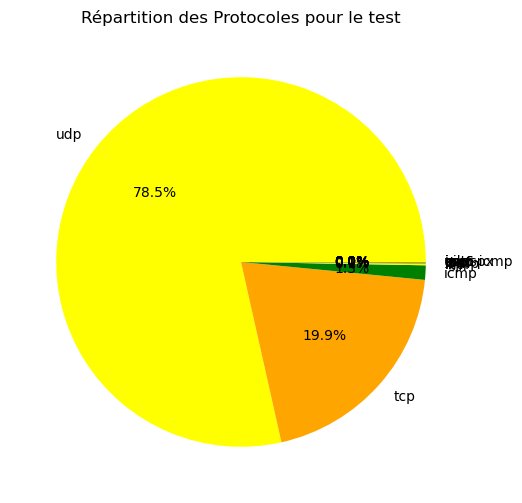

In [4]:
import matplotlib.pyplot as plt

# Compter les occurrences des protocoles
proto_counts = df_test_9['Proto'].value_counts()
print(proto_counts)
# Afficher un graphique en camembert
plt.figure(figsize=(6,6))
proto_counts.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'orange', 'green'])
plt.title('Répartition des Protocoles pour le test')
plt.ylabel('')
plt.show()


## Répartition des Protocoles pour le data train

Proto
udp          851563
tcp          321651
icmp         133425
igmp           1328
rtp             799
rtcp            575
arp             375
ipv6-icmp        40
esp              10
ipx/spx           9
ipv6              6
pim               5
udt               3
llc               2
Name: count, dtype: int64


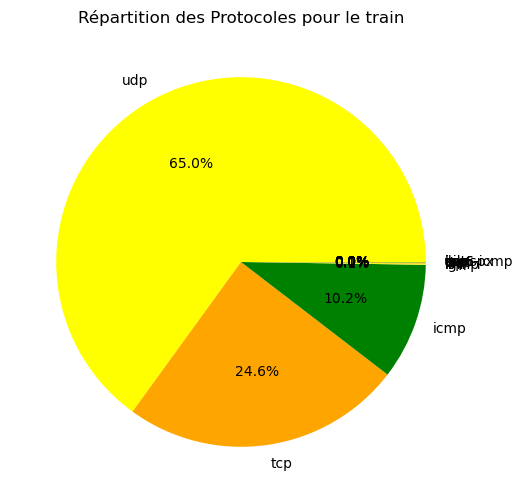

In [5]:
import matplotlib.pyplot as plt

# Compter les occurrences des protocoles
proto_counts = df_train_3['Proto'].value_counts()
print(proto_counts)
# Afficher un graphique en camembert
plt.figure(figsize=(6,6))
proto_counts.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'orange', 'green'])
plt.title('Répartition des Protocoles pour le train')
plt.ylabel('')
plt.show()


## Adresses IP les plus fréquentes pour le test

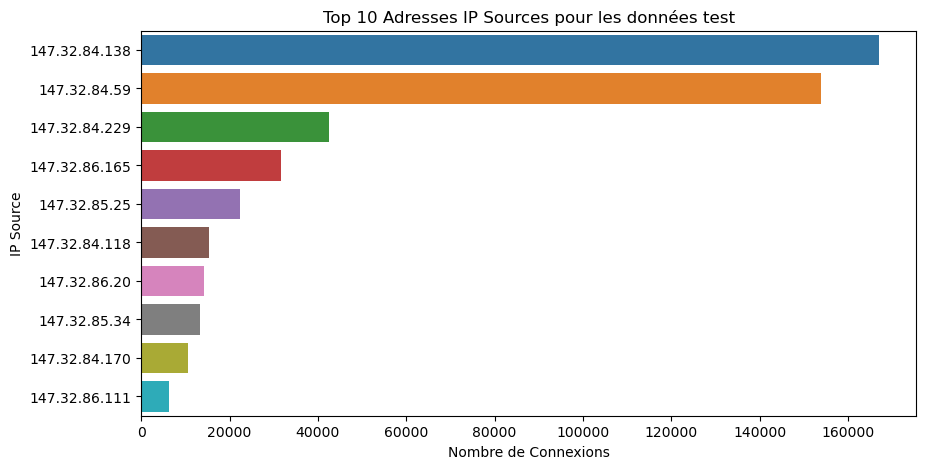

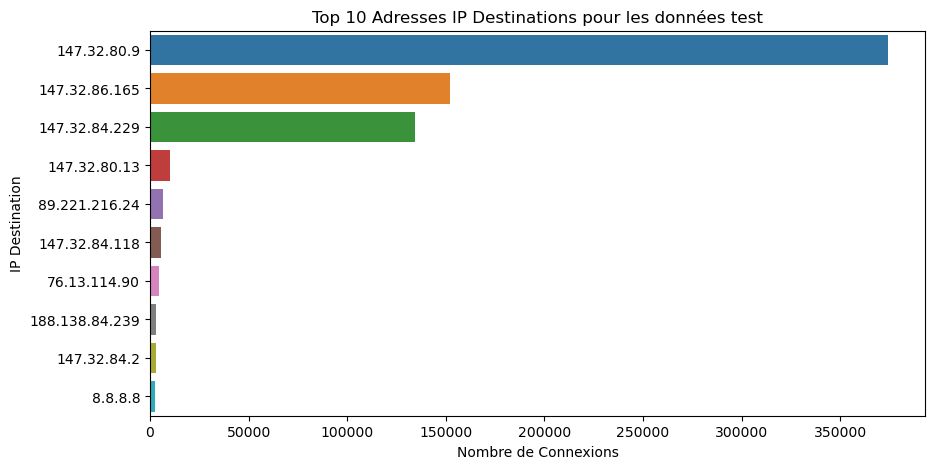

In [6]:
# Top 10 adresses IP sources
plt.figure(figsize=(10,5))
sns.countplot(y=df_test_9['SrcAddr'], order=df_test_9['SrcAddr'].value_counts().iloc[:10].index)
plt.title('Top 10 Adresses IP Sources pour les données test')
plt.xlabel('Nombre de Connexions')
plt.ylabel('IP Source')
plt.show()

# Top 10 adresses IP destinations
plt.figure(figsize=(10,5))
sns.countplot(y=df_test_9['DstAddr'], order=df_test_9['DstAddr'].value_counts().iloc[:10].index)
plt.title('Top 10 Adresses IP Destinations pour les données test')
plt.xlabel('Nombre de Connexions')
plt.ylabel('IP Destination')
plt.show()


## Adresses IP les plus fréquentes pour le train

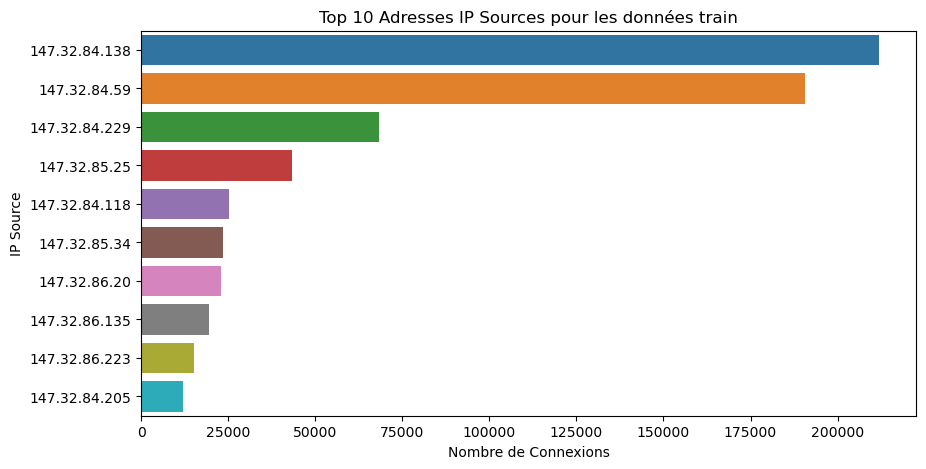

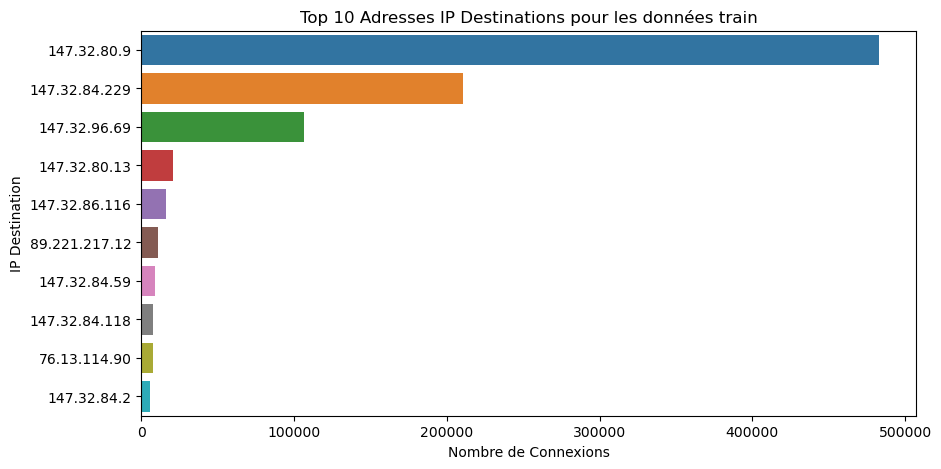

In [7]:
# Top 10 adresses IP sources
plt.figure(figsize=(10,5))
sns.countplot(y=df_train_3['SrcAddr'], order=df_train_3['SrcAddr'].value_counts().iloc[:10].index)
plt.title('Top 10 Adresses IP Sources pour les données train')
plt.xlabel('Nombre de Connexions')
plt.ylabel('IP Source')
plt.show()

# Top 10 adresses IP destinations
plt.figure(figsize=(10,5))
sns.countplot(y=df_train_3['DstAddr'], order=df_train_3['DstAddr'].value_counts().iloc[:10].index)
plt.title('Top 10 Adresses IP Destinations pour les données train')
plt.xlabel('Nombre de Connexions')
plt.ylabel('IP Destination')
plt.show()


# Top 10 Combinaisons Destination Adress - Sport  et  Source Address - Dport pour le test

In [8]:
def is_hex(s):
    try:
        int(str(s), 16)
        return True
    except ValueError:
        return False

# Convert hexadecimal values to decimal in 'sport' column
df_test_9.loc[df_test_9['Sport'].apply(is_hex), 'Sport'] = df_test_9.loc[df_test_9['Sport'].apply(is_hex), 'Sport'].apply(lambda x: int(str(x), 16))

# Convert hexadecimal values to decimal in 'dport' column
df_test_9.loc[df_test_9['Dport'].apply(is_hex), 'Dport'] = df_test_9.loc[df_test_9['Dport'].apply(is_hex), 'Dport'].apply(lambda x: int(str(x), 16))

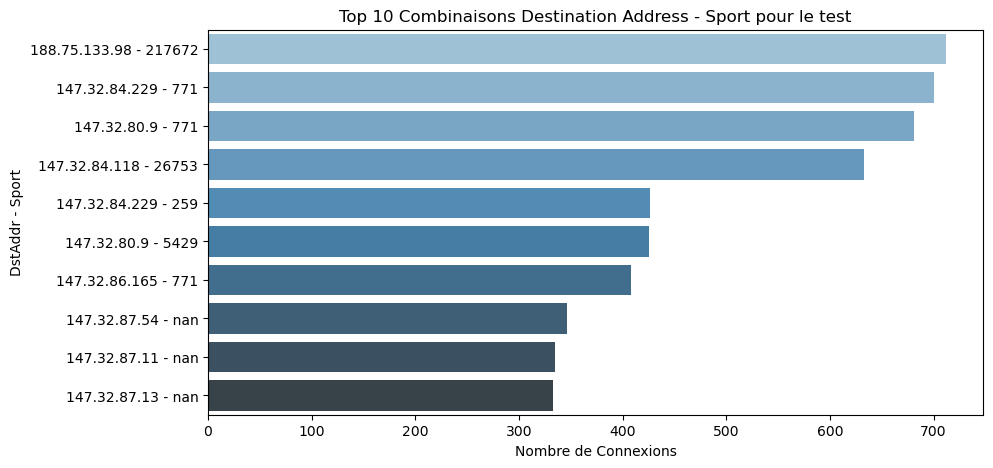

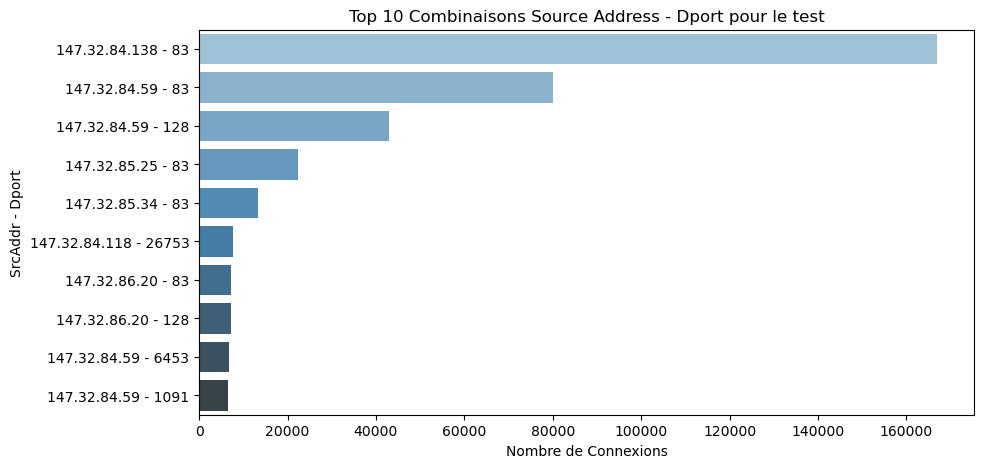

In [9]:
# Créer une colonne pour la combinaison Destination Address - Sport
df_test_9['DstAddr_Sport'] = df_test_9['DstAddr'].astype(str) + " - " + df_test_9['Sport'].astype(str)
# Obtenir le top 10 de ces combinaisons
top10_dst_sport = df_test_9['DstAddr_Sport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_dst_sport.values, y=top10_dst_sport.index, palette="Blues_d")
plt.title('Top 10 Combinaisons Destination Address - Sport pour le test')
plt.xlabel('Nombre de Connexions')
plt.ylabel('DstAddr - Sport')
plt.show()

# Créer une colonne pour la combinaison Source Address - Dport
df_test_9['SrcAddr_Dport'] = df_test_9['SrcAddr'].astype(str) + " - " + df_test_9['Dport'].astype(str)
# Obtenir le top 10 de ces combinaisons
top10_src_dport = df_test_9['SrcAddr_Dport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_src_dport.values, y=top10_src_dport.index, palette="Blues_d")
plt.title('Top 10 Combinaisons Source Address - Dport pour le test')
plt.xlabel('Nombre de Connexions')
plt.ylabel('SrcAddr - Dport')
plt.show()


# Top 10 Combinaisons Destination Adress - Sport  et  Source Address - Dport pour le train

In [10]:
def is_hex(s):
    try:
        int(str(s), 16)
        return True
    except ValueError:
        return False

# Convert hexadecimal values to decimal in 'sport' column
df_train_3.loc[df_train_3['Sport'].apply(is_hex), 'Sport'] = df_train_3.loc[df_train_3['Sport'].apply(is_hex), 'Sport'].apply(lambda x: int(str(x), 16))

# Convert hexadecimal values to decimal in 'dport' column
df_train_3.loc[df_train_3['Dport'].apply(is_hex), 'Dport'] = df_train_3.loc[df_train_3['Dport'].apply(is_hex), 'Dport'].apply(lambda x: int(str(x), 16))

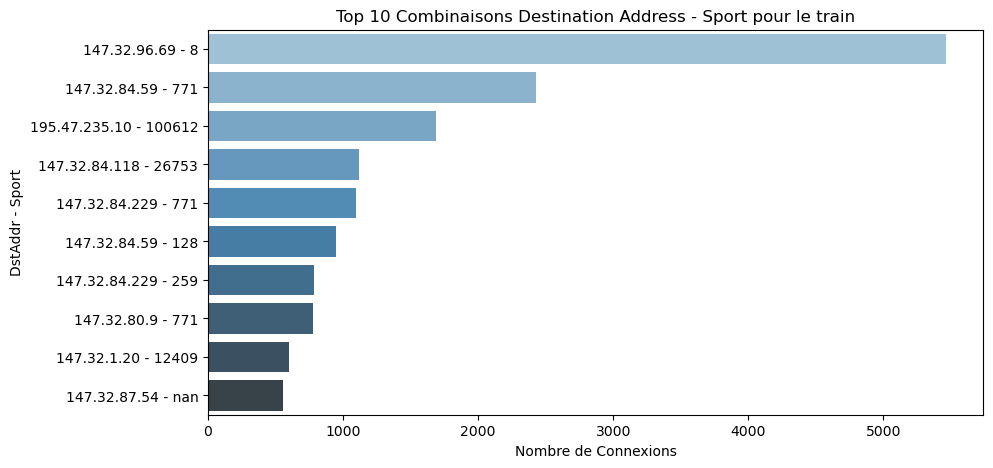

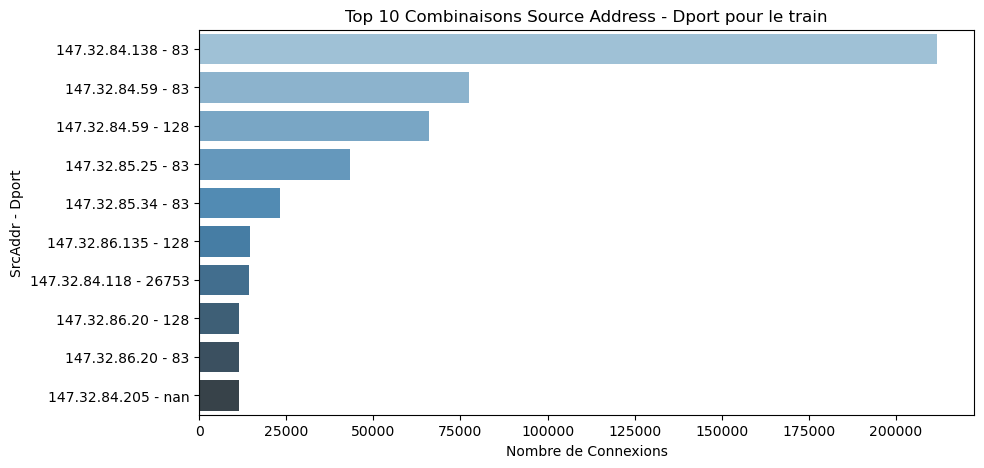

In [11]:
# Créer une colonne pour la combinaison Destination Address - Sport
df_train_3['DstAddr_Sport'] = df_train_3['DstAddr'].astype(str) + " - " + df_train_3['Sport'].astype(str)
# Obtenir le top 10 de ces combinaisons
top10_dst_sport = df_train_3['DstAddr_Sport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_dst_sport.values, y=top10_dst_sport.index, palette="Blues_d")
plt.title('Top 10 Combinaisons Destination Address - Sport pour le train')
plt.xlabel('Nombre de Connexions')
plt.ylabel('DstAddr - Sport')
plt.show()

# Créer une colonne pour la combinaison Source Address - Dport
df_train_3['SrcAddr_Dport'] = df_train_3['SrcAddr'].astype(str) + " - " + df_train_3['Dport'].astype(str)
# Obtenir le top 10 de ces combinaisons
top10_src_dport = df_train_3['SrcAddr_Dport'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top10_src_dport.values, y=top10_src_dport.index, palette="Blues_d")
plt.title('Top 10 Combinaisons Source Address - Dport pour le train')
plt.xlabel('Nombre de Connexions')
plt.ylabel('SrcAddr - Dport')
plt.show()


# Preprocessing des labels pour le test

In [12]:
# Affiche tous les labels uniques présents dans la colonne 'Label' du DataFrame df_test_9
print(df_test_9['Label'].unique())
# Affiche le nombre de valeurs uniques dans la colonne 'Label'
print(df_test_9['Label'].nunique()) 

['flow=Background-UDP-Established' 'flow=Background'
 'flow=From-Background-CVUT-Proxy' 'flow=Background-TCP-Attempt'
 'flow=From-Normal-V50-Jist' 'flow=Background-Established-cmpgw-CVUT'
 'flow=Background-UDP-Attempt' 'flow=To-Background-UDP-CVUT-DNS-Server'
 'flow=To-Background-CVUT-Proxy' 'flow=To-Background-Jist'
 'flow=Background-TCP-Established'
 'flow=From-Normal-V50-UDP-CVUT-DNS-Server'
 'flow=Background-UDP-NTP-Established-1' 'flow=From-Normal-V50-Stribrek'
 'flow=Background-Attempt-cmpgw-CVUT' 'flow=To-Normal-V50-UDP-NTP-server'
 'flow=To-Background-CVUT-WebServer' 'flow=Background-google-webmail'
 'flow=Background-google-pop' 'flow=Background-google-analytics11'
 'flow=Background-google-analytics14' 'flow=Background-google-analytics5'
 'flow=Background-google-analytics3' 'flow=Background-google-analytics10'
 'flow=From-Normal-V50-Grill' 'flow=From-Normal-V50-CVUT-WebServer'
 'flow=Background-ajax.google' 'flow=Background-google-analytics12'
 'flow=Background-google-analytics

# Preprocessing des labels pour le train

In [13]:
# Affiche tous les labels uniques présents dans la colonne 'Label' 
print(df_train_3['Label'].unique())
# Affiche le nombre de valeurs uniques dans la colonne 'Label'
print(df_train_3['Label'].nunique()) 

['flow=Background-Established-cmpgw-CVUT' 'flow=Background'
 'flow=Background-UDP-Established' 'flow=Background-UDP-Attempt'
 'flow=From-Background-CVUT-Proxy' 'flow=Background-TCP-Attempt'
 'flow=Background-TCP-Established'
 'flow=To-Background-UDP-CVUT-DNS-Server' 'flow=To-Background-Grill'
 'flow=Background-Attempt-cmpgw-CVUT'
 'flow=Background-UDP-NTP-Established-1' 'flow=Background-google-webmail'
 'flow=Background-google-analytics11' 'flow=To-Background-CVUT-Proxy'
 'flow=From-Normal-V51-Grill' 'flow=Background-google-analytics10'
 'flow=From-Normal-V51-Stribrek' 'flow=Background-google-analytics6'
 'flow=To-Background-Stribrek' 'flow=Background-google-analytics9'
 'flow=To-Background-CVUT-WebServer' 'flow=Background-google-analytics15'
 'flow=Background-google-analytics2' 'flow=From-Normal-V51-Jist'
 'flow=Background-google-analytics8' 'flow=To-Background-Jist'
 'flow=Background-google-analytics3' 'flow=Background-google-analytics14'
 'flow=To-Background-MatLab-Server' 'flow=To-

## remplacer les valeurs manquantes

In [14]:
print(df_test_9.isnull().sum())

StartTime            0
Dur                  0
Proto                0
SrcAddr              0
Sport             4277
Dir                  1
DstAddr              1
Dport             2113
State                3
sTos              4964
dTos             47520
TotPkts              1
TotBytes             1
SrcBytes             1
Label                1
DstAddr_Sport        0
SrcAddr_Dport        0
dtype: int64


In [15]:
print(df_train_3.isnull().sum())

StartTime             0
Dur                   0
Proto                 0
SrcAddr               0
Sport              6987
Dir                   0
DstAddr               0
Dport            104215
State              1228
sTos              12852
dTos             186791
TotPkts               0
TotBytes              0
SrcBytes              0
Label                 0
DstAddr_Sport         0
SrcAddr_Dport         0
dtype: int64


In [16]:
# Suppression des lignes où l'une des colonnes d'intérêt est nulle
df_test_9.dropna(subset=['Dport', 'Sport', 'SrcAddr', 'DstAddr'], inplace=True)
print(df_test_9.isnull().sum())

StartTime            0
Dur                  0
Proto                0
SrcAddr              0
Sport                0
Dir                  0
DstAddr              0
Dport                0
State                2
sTos              1535
dTos             45403
TotPkts              0
TotBytes             0
SrcBytes             0
Label                0
DstAddr_Sport        0
SrcAddr_Dport        0
dtype: int64


In [17]:
# Suppression des lignes où l'une des colonnes d'intérêt est nulle
df_train_3.dropna(subset=['Dport', 'Sport', 'SrcAddr', 'DstAddr'], inplace=True)
print(df_train_3.isnull().sum())

StartTime            0
Dur                  0
Proto                0
SrcAddr              0
Sport                0
Dir                  0
DstAddr              0
Dport                0
State                1
sTos              7170
dTos             82640
TotPkts              0
TotBytes             0
SrcBytes             0
Label                0
DstAddr_Sport        0
SrcAddr_Dport        0
dtype: int64


# Le traffic total df sous forme diagramme circulaire avec le nombre Botnet et normal pour les testing set

## Conversion des Labels en Valeurs Binaires (1= Botnet, 0= Normal) 

In [18]:
df_test_9.loc[df_test_9['Label'].str.contains("Botnet", na=False), 'Label'] = 1  # Si "Botnet" est présent -> 1
df_test_9.loc[df_test_9['Label'] != 1, 'Label'] = 0
df_test_9.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,DstAddr_Sport,SrcAddr_Dport
0,2011/08/17 11:34:49.436881,1823.088379,udp,46.196.43.16,26753,<->,147.32.84.118,26753,CON,0.0,0.0,2.0,214.0,107.0,0,147.32.84.118 - 26753,46.196.43.16 - 26753
1,2011/08/17 11:39:01.485380,2005.431641,udp,82.1.195.156,26753,<->,147.32.84.118,26753,CON,0.0,0.0,2.0,214.0,107.0,0,147.32.84.118 - 26753,82.1.195.156 - 26753
2,2011/08/17 11:40:19.495285,1973.646729,udp,151.28.221.122,26753,<->,147.32.84.118,26753,CON,0.0,0.0,2.0,214.0,107.0,0,147.32.84.118 - 26753,151.28.221.122 - 26753
3,2011/08/17 12:01:01.780520,3599.997803,udp,188.75.133.98,90624,<->,147.32.86.125,217672,CON,0.0,0.0,409227.0,207547419.0,182657149.0,0,147.32.86.125 - 90624,188.75.133.98 - 217672
4,2011/08/17 12:01:01.782109,2059.387451,tcp,119.252.172.92,364647,<?>,147.32.84.14,128,RA_PA,0.0,0.0,224275.0,266462578.0,3199174.0,0,147.32.84.14 - 364647,119.252.172.92 - 128


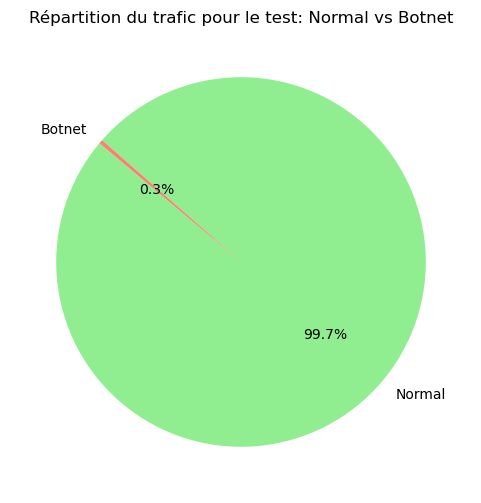

In [19]:
# Calculer le nombre de flux pour chaque label
label_counts = df_test_9['Label'].value_counts()

# Créer des étiquettes adaptées
labels = ['Normal' if label == 0 else 'Botnet' for label in label_counts.index]

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Répartition du trafic pour le test: Normal vs Botnet')
plt.show()


# Le traffic total df sous forme diagramme circulaire avec le nombre Botnet et normal pour les training set

## Conversion des Labels en Valeurs Binaires (1= Botnet, 0= Normal) 

In [20]:
df_train_3.loc[df_train_3['Label'].str.contains("Botnet", na=False), 'Label'] = 1  # Si "Botnet" est présent -> 1
df_train_3.loc[df_train_3['Label'] != 1, 'Label'] = 0
df_train_3.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,DstAddr_Sport,SrcAddr_Dport
0,2011/08/18 09:56:29.146156,2752.656250,udp,71.222.124.71,394785,<->,147.32.84.59,406864,CON,0.0,0.0,3,435,290,0,147.32.84.59 - 394785,71.222.124.71 - 406864
1,2011/08/18 09:56:42.630892,1849.315552,udp,78.234.54.245,332819,<->,147.32.84.59,406864,CON,0.0,0.0,3,417,272,0,147.32.84.59 - 332819,78.234.54.245 - 406864
2,2011/08/18 09:56:44.640650,2091.747314,udp,31.147.120.139,405909,<->,147.32.84.59,406864,CON,0.0,0.0,2,290,145,0,147.32.84.59 - 405909,31.147.120.139 - 406864
3,2011/08/18 10:10:52.782230,1535.769409,udp,118.5.35.64,233744,<->,147.32.84.59,406864,CON,0.0,0.0,2,290,145,0,147.32.84.59 - 233744,118.5.35.64 - 406864
4,2011/08/18 10:19:13.328372,0.002636,tcp,147.32.86.166,209958,<?>,212.24.150.110,152643,FRPA_FPA,0.0,0.0,6,490,321,0,212.24.150.110 - 209958,147.32.86.166 - 152643


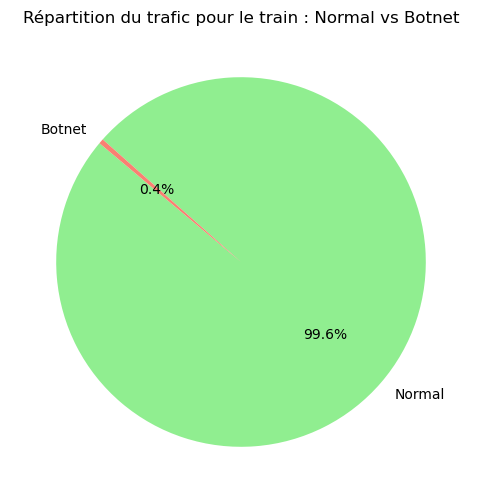

In [21]:
# Calculer le nombre de flux pour chaque label
label_counts = df_train_3['Label'].value_counts()

# Créer des étiquettes adaptées
labels = ['Normal' if label == 0 else 'Botnet' for label in label_counts.index]

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])
plt.title('Répartition du trafic pour le train : Normal vs Botnet')
plt.show()


# Algo de détection de menace CAMNEP avec distance euclidienne

In [22]:
df_train_ex=df_train_3.copy()
df_train_ex['StartTime'] = pd.to_datetime(df_train_ex['StartTime'])

# Calcul de la durée totale
duration = df_train_ex['StartTime'].max() - df_train_ex['StartTime'].min()
duration_minutes = duration.total_seconds() / 60
print("La durée totale en minutes est: {:.2f} minutes".format(duration_minutes))
print("La durée totale est:", duration)
# Cette dureée sert à fixer N par défaut. En effet, par défaut, on prend N* avec N*>=N pour les données entrainements
N_max=duration_minutes + 1

La durée totale en minutes est: 308.51 minutes
La durée totale est: 0 days 05:08:30.557816


In [23]:
#le N sert à réduire le nombre de données de train à utiliser en prenant les N premières minutes
def run_camnep_train_detection(df, N=N_max):
    """
    Entraîne le modèle CAMNEP sur les N premières minutes de df.
    Seuls les flux normaux (Label == 0) sont utilisés pour l'entraînement.
    
    Paramètres:
      - df: DataFrame contenant les flux NetFlow et une colonne "StartTime".
      - N: Nombre de minutes à utiliser pour l'entraînement.
      
    Retourne:
      - model: dictionnaire contenant les moyennes et écarts-types (mu et std) des features log-transformées.
      - df_train: DataFrame contenant les flux normaux utilisés pour l'entraînement.
    """
    import numpy as np
    import pandas as pd

    # Conversion de "StartTime" en datetime et tri du DataFrame par StartTime
    df['StartTime'] = pd.to_datetime(df['StartTime'])
    df.sort_values(by='StartTime', inplace=True)
    
    # Définir la coupure temporelle basée sur les N premières minutes
    min_time = df['StartTime'].min()
    cutoff = min_time + pd.Timedelta(minutes=N)
    
    # Sélectionner les flux des N premières minutes
    df_train_initial = df[df['StartTime'] <= cutoff].copy()
    
    # Conserver uniquement le trafic normal
    df_train = df_train_initial[df_train_initial['Label'] == 0].copy()
    
    print(f"Nombre de flux pour l'entraînement: {df_train.shape[0]}")
    
    # Calcul des features
    df_train['f1'] = df_train.groupby('SrcAddr')['SrcAddr'].transform('count')
    df_train['f2'] = df_train.groupby('DstAddr')['DstAddr'].transform('count')
    df_train['f3'] = df_train.groupby(['DstAddr', 'Sport'])['Sport'].transform('count')
    df_train['f4'] = df_train.groupby(['SrcAddr', 'Dport'])['Dport'].transform('count')
    
    # Transformation logarithmique pour atténuer les valeurs extrêmes
    df_train['f1_log'] = np.log(df_train['f1'] + 1)
    df_train['f2_log'] = np.log(df_train['f2'] + 1)
    df_train['f3_log'] = np.log(df_train['f3'] + 1)
    df_train['f4_log'] = np.log(df_train['f4'] + 1)
    
    # Calcul des moyennes et écarts-types sur le training set
    mu1, std1 = df_train['f1_log'].mean(), df_train['f1_log'].std()
    mu2, std2 = df_train['f2_log'].mean(), df_train['f2_log'].std()
    mu3, std3 = df_train['f3_log'].mean(), df_train['f3_log'].std()
    mu4, std4 = df_train['f4_log'].mean(), df_train['f4_log'].std()
    
    model = {
        "mu1": mu1, "std1": std1,
        "mu2": mu2, "std2": std2,
        "mu3": mu3, "std3": std3,
        "mu4": mu4, "std4": std4
    }
    
    return model,df_train


In [24]:
def run_camnep_test_detection(df_test,df_train, N=N_max, threshold=0.6):
    """
    Applique le modèle CAMNEP sur un dataset de test pour détecter les anomalies.
    
    Paramètres:
      - df_test: DataFrame du scénario de test.
      - df_train: DataFrame à utiliser pour le train 
      - N: Nombre de minutes à utiliser pour l'entraînement.
      - threshold: seuil pour classifier un flux comme anomalie.
      
    Retourne:
      - df_test: DataFrame enrichi avec les colonnes 'anomaly_score' et 'predicted_label'.
    """
    import numpy as np
    import pandas as pd

    # Calcul des features sur le jeu de test
    df_test['f1'] = df_test.groupby('SrcAddr')['SrcAddr'].transform('count')
    df_test['f2'] = df_test.groupby('DstAddr')['DstAddr'].transform('count')
    df_test['f3'] = df_test.groupby(['DstAddr', 'Sport'])['Sport'].transform('count')
    df_test['f4'] = df_test.groupby(['SrcAddr', 'Dport'])['Dport'].transform('count')
    
    # Transformation logarithmique
    df_test['f1_log'] = np.log(df_test['f1'] + 1)
    df_test['f2_log'] = np.log(df_test['f2'] + 1)
    df_test['f3_log'] = np.log(df_test['f3'] + 1)
    df_test['f4_log'] = np.log(df_test['f4'] + 1)
    
    model,_ = run_camnep_train_detection(df_train.copy(), N)
    
    # Calcul de la distance globale par rapport aux paramètres du modèle
    df_test['d1'] = ((df_test['f1_log'] - model["mu1"]) / model["std1"]) ** 2
    df_test['d2'] = ((df_test['f2_log'] - model["mu2"]) / model["std2"]) ** 2
    df_test['d3'] = ((df_test['f3_log'] - model["mu3"]) / model["std3"]) ** 2
    df_test['d4'] = ((df_test['f4_log'] - model["mu4"]) / model["std4"]) ** 2
    df_test['distance_total'] = df_test['d1'] + df_test['d2'] + df_test['d3'] + df_test['d4']
    
    # Transformation sigmoïde pour obtenir un score entre 0 et 1
    df_test['anomaly_score'] = 1 / (1 + np.exp(-df_test['distance_total']))
    
    # Classification en fonction du seuil
    df_test['predicted_label'] = np.where(df_test['anomaly_score'] > threshold, 1, 0)
    
    return df_test


# Visualisation de la performance du CAMNEP euclidienne avec plusieurs N premières minutes et seuils

Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 1195173
Nombre de flux pour l'entraînement: 1195173
Nombre de flux pour l'entraînement: 1195173
Nombre de flux pour l'entraînement: 1195173
Nombre de flux pour l'entraînement: 1195173


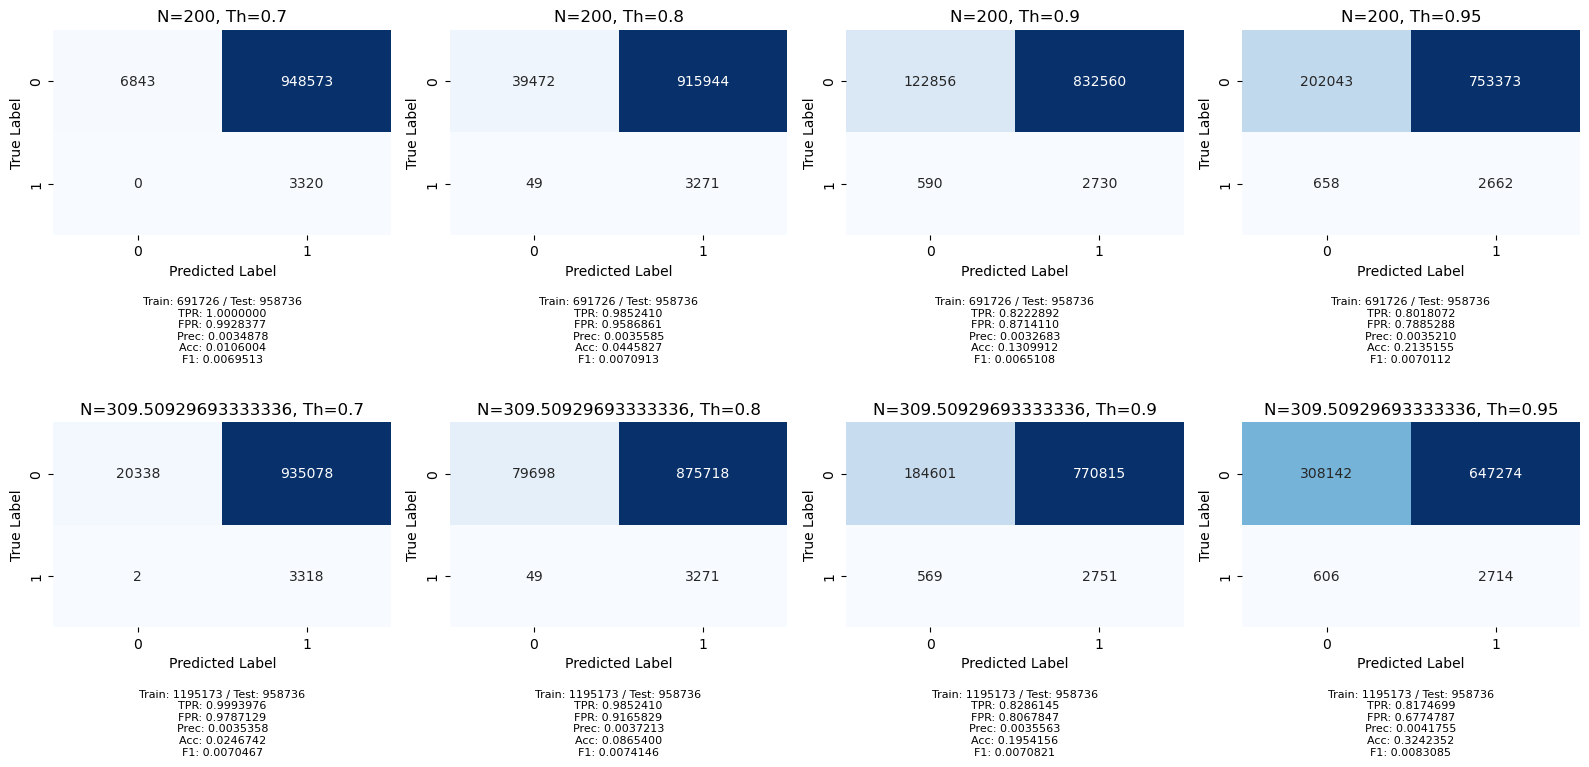

In [25]:
def plot_conf_matrices_camnep_with_metrics_and_counts(df_for_test, df_for_tain, N_values, threshold_values):
    """
    Pour chaque combinaison de N (minutes d'entraînement) et de threshold,
    - Entraîne le modèle sur df (en utilisant run_camnep_train_detection qui retourne
      le modèle et le DataFrame d'entraînement, composé uniquement de trafic normal)
    - Applique le modèle sur le même df via run_camnep_test_detection avec le seuil donné
    - Affiche la heatmap de la matrice de confusion et, en dessous, un résumé des métriques :
         * Nombre de flux pour l'entraînement (df_train.shape[0])
         * Nombre de flux pour le test (df_test.shape[0])
         * TPR (Recall), FPR, Précision, Exactitude, F1-score
    """
    n_rows = len(N_values)
    n_cols = len(threshold_values)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), squeeze=False)
    
    for i, N in enumerate(N_values):
        # Entraîner le modèle sur les N premières minutes
        model, df_train = run_camnep_train_detection(df_for_tain.copy(), N)
        n_train = df_train.shape[0]
        
        for j, thresh in enumerate(threshold_values):
            # Appliquer le modèle sur le dataset de test
            df_test = run_camnep_test_detection(df_for_test.copy(), df_for_tain.copy(), N, threshold=thresh)
            n_test = df_test.shape[0]
            
            # Récupération des labels réels et prédits
            y_true = df_test['Label'].astype(int)
            y_pred = df_test['predicted_label'].astype(int)
            
            # Calcul de la matrice de confusion
            cm = confusion_matrix(y_true, y_pred)
            # S'assurer que la matrice est 2x2 (au cas où une classe manquerait)
            if cm.shape != (2, 2):
                cm_full = np.zeros((2, 2), dtype=int)
                cm_full[:cm.shape[0], :cm.shape[1]] = cm
                cm = cm_full
            TN, FP, FN, TP = cm.ravel()
            
            # Calcul des métriques avec sklearn
            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, zero_division=np.nan)
            recall = recall_score(y_true, y_pred, zero_division=np.nan)  # TPR
            f1 = f1_score(y_true, y_pred, zero_division=np.nan)
            
            # Calcul manuel de FPR (pour information)
            FPR = FP / (TN + FP) if (TN + FP) > 0 else np.nan
            
            ax = axes[i, j]
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
            ax.set_xlabel('Predicted Label')
            ax.set_ylabel('True Label')
            ax.set_title(f'N={N}, Th={thresh}')
        
            metrics_str = (
                f"Train: {n_train} / Test: {n_test}\n"
                f"TPR: {recall:.7f}\n"
                f"FPR: {FPR:.7f}\n"
                f"Prec: {precision:.7f}\n"
                f"Acc: {accuracy:.7f}\n"
                f"F1: {f1:.7f}"
            )
            ax.text(0.5, -0.30, metrics_str, transform=ax.transAxes, 
                    ha='center', va='top', fontsize=8)
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
N_values = [200,N_max]
threshold_values = [0.7, 0.8, 0.9, 0.95]
plot_conf_matrices_camnep_with_metrics_and_counts(df_test_9,df_train_3, N_values, threshold_values)

# Algo de détection de menace CAMNEP avec distance LOF

In [26]:
def run_camnep_test_detection_lof(df_test, df_train, N=N_max, n_neighbors=20, threshold=0.6):
    """
    Applique le modèle CAMNEP avec LOF sur un dataset de test pour détecter les anomalies.
    
    Paramètres:
      - df_test: DataFrame du scénario de test.
      - df_train: DataFrame d'entraînement (flux normaux utilisés pour l'entraînement).
      - N: Nombre de minutes à utiliser pour l'entraînement.
      - threshold: seuil pour classifier un flux comme anomalie.
      - n_neighbors: nombre de voisins à utiliser dans LOF.
      
    Retourne:
      - df_test: DataFrame enrichi avec les colonnes 'lof_score' et 'predicted_label'.
    """
    df_test['f1'] = df_test.groupby('SrcAddr')['SrcAddr'].transform('count')
    df_test['f2'] = df_test.groupby('DstAddr')['DstAddr'].transform('count')
    df_test['f3'] = df_test.groupby(['DstAddr', 'Sport'])['Sport'].transform('count')
    df_test['f4'] = df_test.groupby(['SrcAddr', 'Dport'])['Dport'].transform('count')
    
    df_test['f1_log'] = np.log(df_test['f1'] + 1)
    df_test['f2_log'] = np.log(df_test['f2'] + 1)
    df_test['f3_log'] = np.log(df_test['f3'] + 1)
    df_test['f4_log'] = np.log(df_test['f4'] + 1)
    
    _, df_train = run_camnep_train_detection(df_train.copy(), N)
    features = ['f1_log', 'f2_log', 'f3_log', 'f4_log']
    
    X_train = df_train[features]
    X_test = df_test[features]
    
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, novelty=True)
    lof.fit(X_train)
    lof_scores = lof.decision_function(X_test)
    df_test['lof_score'] = lof_scores
    df_test['predicted_label'] = np.where(lof_scores < threshold, 1, 0)
    
    print(df_test[['SrcAddr', 'DstAddr', 'Sport', 'Dport', 'lof_score', 'predicted_label']].head(10))
    return df_test

# Visualisation du CAMNEP LOF avec plusieurs seuils, N premières minutes et neighbors

Nombre de flux pour l'entraînement: 691726
Nombre de flux pour l'entraînement: 691726


C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.151421e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.151421e+09   
3   188.75.133.98  147.32.86.125   90624  217672  3.440023e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.094282e+00   
5  90.183.101.168   147.32.86.89     128    4470  4.605269e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -8.669320e-01   
7  119.252.172.92   147.32.84.14  364646     128 -3.094282e+00   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -1.053433e+08   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 691726

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.151421e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.151421e+09   
3   188.75.133.98  147.32.86.125   90624  217672  3.440023e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.094282e+00   
5  90.183.101.168   147.32.86.89     128    4470  4.605269e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -8.669320e-01   
7  119.252.172.92   147.32.84.14  364646     128 -3.094282e+00   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -1.053433e+08   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 691726

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.151421e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.151421e+09   
3   188.75.133.98  147.32.86.125   90624  217672  3.440023e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.094282e+00   
5  90.183.101.168   147.32.86.89     128    4470  4.605269e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -8.669320e-01   
7  119.252.172.92   147.32.84.14  364646     128 -3.094282e+00   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -1.053433e+08   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 691726

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.381759e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.381759e+09   
3   188.75.133.98  147.32.86.125   90624  217672  1.535892e-01   
4  119.252.172.92   147.32.84.14  364647     128 -4.489199e-01   
5  90.183.101.168   147.32.86.89     128    4470  4.399364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -4.021135e+08   
7  119.252.172.92   147.32.84.14  364646     128 -4.489199e-01   
8  89.185.253.133  147.32.86.107    1091  333061  4.980442e-01   
9   80.246.200.81   147.32.87.27  411762     128 -7.112096e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                0  
5                0  
6                1  
7                0  
8                0  
9                1  
Nombre de flux pour l'entraînement: 691726

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.381759e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.381759e+09   
3   188.75.133.98  147.32.86.125   90624  217672  1.535892e-01   
4  119.252.172.92   147.32.84.14  364647     128 -4.489199e-01   
5  90.183.101.168   147.32.86.89     128    4470  4.399364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -4.021135e+08   
7  119.252.172.92   147.32.84.14  364646     128 -4.489199e-01   
8  89.185.253.133  147.32.86.107    1091  333061  4.980442e-01   
9   80.246.200.81   147.32.87.27  411762     128 -7.112096e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 691726

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.603523e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -2.381759e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -2.381759e+09   
3   188.75.133.98  147.32.86.125   90624  217672  1.535892e-01   
4  119.252.172.92   147.32.84.14  364647     128 -4.489199e-01   
5  90.183.101.168   147.32.86.89     128    4470  4.399364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -4.021135e+08   
7  119.252.172.92   147.32.84.14  364646     128 -4.489199e-01   
8  89.185.253.133  147.32.86.107    1091  333061  4.980442e-01   
9   80.246.200.81   147.32.87.27  411762     128 -7.112096e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -6.358026e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672  4.691333e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.512982e-01   
5  90.183.101.168   147.32.86.89     128    4470  7.340026e-02   
6  217.169.177.82   147.32.85.26  354640  344389 -5.661768e+08   
7  119.252.172.92   147.32.84.14  364646     128 -3.512982e-01   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -2.998503e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                0  
5                0  
6                1  
7                0  
8                0  
9                1  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -6.358026e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672  4.691333e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.512982e-01   
5  90.183.101.168   147.32.86.89     128    4470  7.340026e-02   
6  217.169.177.82   147.32.85.26  354640  344389 -5.661768e+08   
7  119.252.172.92   147.32.84.14  364646     128 -3.512982e-01   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -2.998503e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -6.358026e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672  4.691333e-01   
4  119.252.172.92   147.32.84.14  364647     128 -3.512982e-01   
5  90.183.101.168   147.32.86.89     128    4470  7.340026e-02   
6  217.169.177.82   147.32.85.26  354640  344389 -5.661768e+08   
7  119.252.172.92   147.32.84.14  364646     128 -3.512982e-01   
8  89.185.253.133  147.32.86.107    1091  333061  5.000000e-01   
9   80.246.200.81   147.32.87.27  411762     128 -2.998503e+07   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                1  
5                0  
6                1  
7                1  
8                0  
9                1  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.590079e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672 -2.448644e-01   
4  119.252.172.92   147.32.84.14  364647     128  3.494918e-01   
5  90.183.101.168   147.32.86.89     128    4470  1.346364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -6.667777e-01   
7  119.252.172.92   147.32.84.14  364646     128  3.494918e-01   
8  89.185.253.133  147.32.86.107    1091  333061 -1.379857e+08   
9   80.246.200.81   147.32.87.27  411762     128  3.210160e-01   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                0  
5                0  
6                1  
7                0  
8                1  
9                0  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.590079e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672 -2.448644e-01   
4  119.252.172.92   147.32.84.14  364647     128  3.494918e-01   
5  90.183.101.168   147.32.86.89     128    4470  1.346364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -6.667777e-01   
7  119.252.172.92   147.32.84.14  364646     128  3.494918e-01   
8  89.185.253.133  147.32.86.107    1091  333061 -1.379857e+08   
9   80.246.200.81   147.32.87.27  411762     128  3.210160e-01   

   predicted_label  
0                1  
1                1  
2                1  
3                0  
4                0  
5                0  
6                1  
7                0  
8                1  
9                0  
Nombre de flux pour l'entraînement: 119517

C:\Users\bamba\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


          SrcAddr        DstAddr   Sport   Dport     lof_score  \
0    46.196.43.16  147.32.84.118   26753   26753 -2.590079e+09   
1    82.1.195.156  147.32.84.118   26753   26753 -6.650955e+09   
2  151.28.221.122  147.32.84.118   26753   26753 -6.650955e+09   
3   188.75.133.98  147.32.86.125   90624  217672 -2.448644e-01   
4  119.252.172.92   147.32.84.14  364647     128  3.494918e-01   
5  90.183.101.168   147.32.86.89     128    4470  1.346364e-01   
6  217.169.177.82   147.32.85.26  354640  344389 -6.667777e-01   
7  119.252.172.92   147.32.84.14  364646     128  3.494918e-01   
8  89.185.253.133  147.32.86.107    1091  333061 -1.379857e+08   
9   80.246.200.81   147.32.87.27  411762     128  3.210160e-01   

   predicted_label  
0                1  
1                1  
2                1  
3                1  
4                0  
5                0  
6                1  
7                0  
8                1  
9                0  


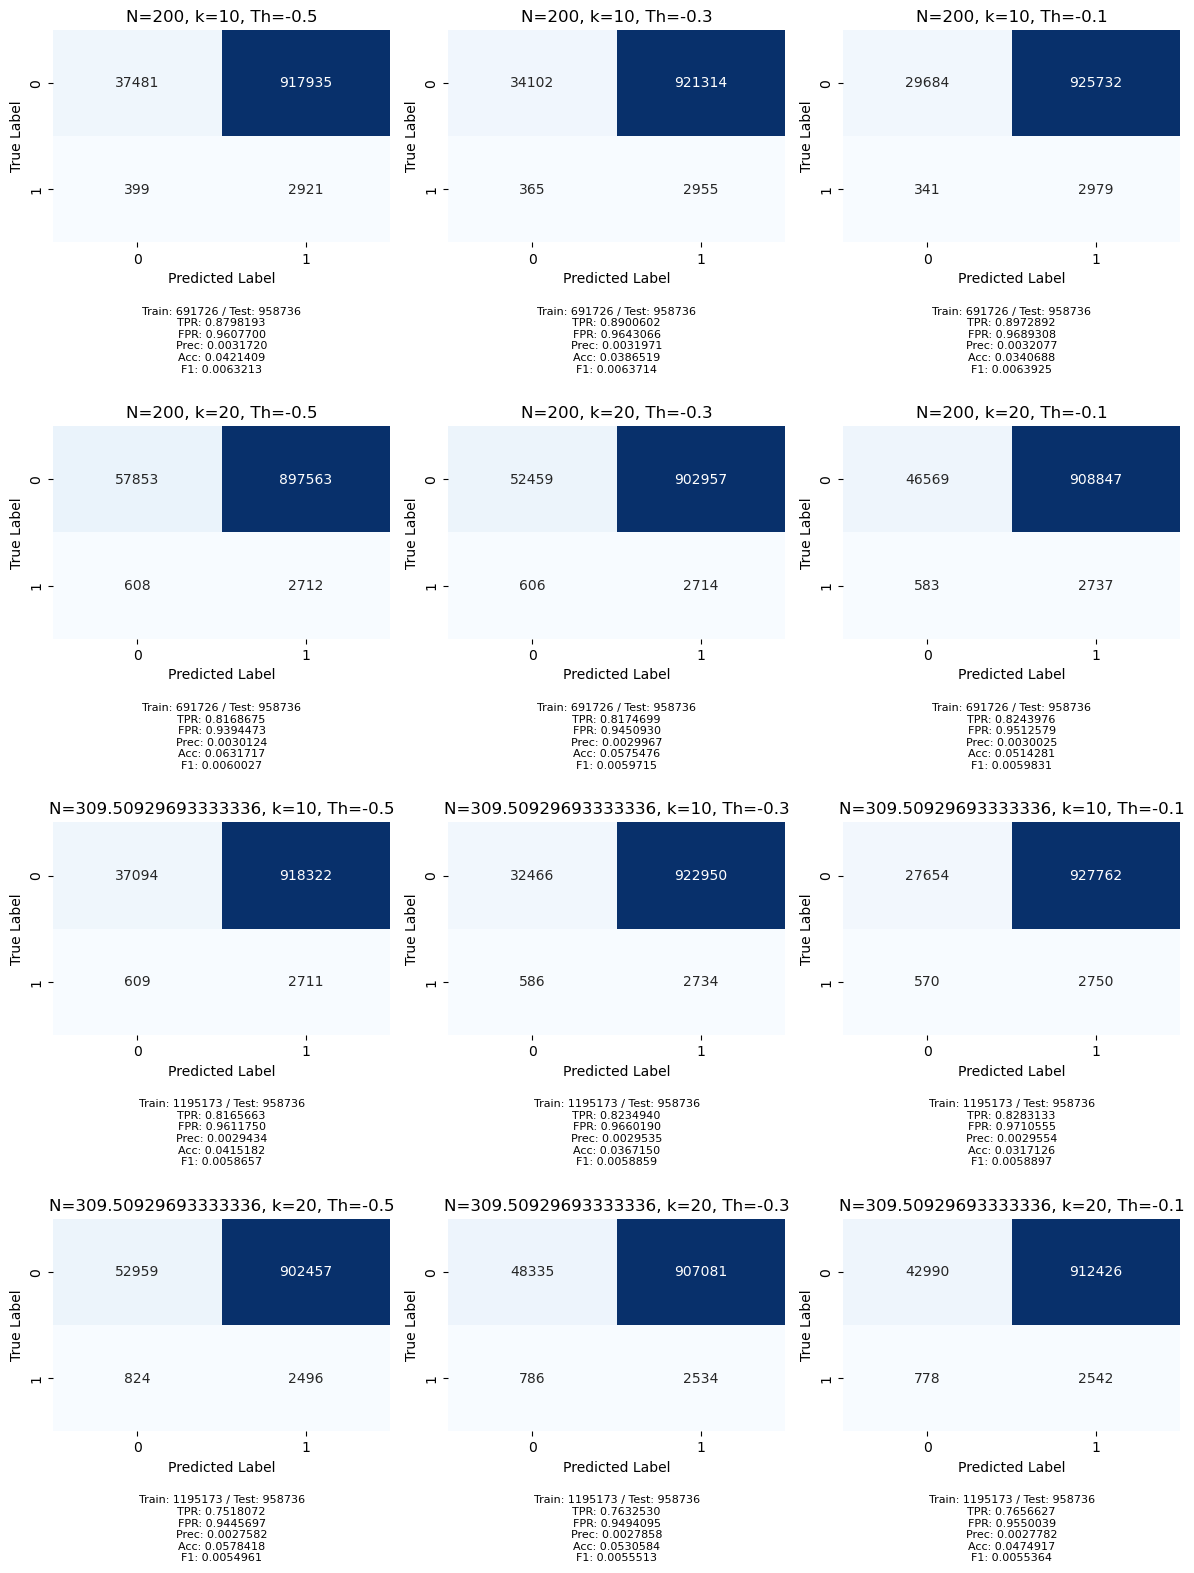

In [27]:
def plot_conf_matrices_camnep_lof_with_metrics_and_counts_separated(df_test, df_train,N_values, neighbors_values, threshold_values):
    """
    Pour chaque combinaison de N (minutes d'entraînement), n_neighbors et threshold :
      - Entraîne le modèle sur train_df via run_camnep_train_detection (qui retourne le modèle et le df_train utilisé)
      - Applique ce modèle sur test_df via run_camnep_test_detection_lof avec le seuil et n_neighbors donnés
      - Affiche la heatmap de la matrice de confusion avec, en dessous, le résumé suivant :
            * Nombre de flux d'entraînement (df_train.shape[0])
            * Nombre de flux de test (df_test.shape[0] après détection)
            * TPR (Recall), FPR, Précision, Exactitude, F1-score
    La grille aura (len(N_values) * len(neighbors_values)) lignes et len(threshold_values) colonnes.
    """
    total_test = df_test.shape[0]
    n_rows = len(N_values) * len(neighbors_values)
    n_cols = len(threshold_values)
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows), squeeze=False)
    row_idx = 0
    for N in N_values:
        # Entraîner le modèle sur train_df pour la durée N (seulement trafic normal)
        model, df_train_used = run_camnep_train_detection(df_train.copy(), N)
        n_train = df_train_used.shape[0]
        
        for n_neighbors in neighbors_values:
            for j, thresh in enumerate(threshold_values):
                # Appliquer le modèle LOF sur le scénario de test
                df_test_pred = run_camnep_test_detection_lof(df_test.copy(), df_train.copy(), N, n_neighbors=n_neighbors,threshold=thresh)
                n_test = df_test_pred.shape[0]
                
                # Récupération des labels réels et prédits
                y_true = df_test_pred['Label'].astype(int)
                y_pred = df_test_pred['predicted_label'].astype(int)
                
                # Calcul de la matrice de confusion
                cm = confusion_matrix(y_true, y_pred)
                if cm.shape != (2, 2):
                    cm_full = np.zeros((2, 2), dtype=int)
                    cm_full[:cm.shape[0], :cm.shape[1]] = cm
                    cm = cm_full
                TN, FP, FN, TP = cm.ravel()
                
                # Calcul des métriques
                accuracy_val = accuracy_score(y_true, y_pred)
                precision_val = precision_score(y_true, y_pred, zero_division=np.nan)
                recall_val = recall_score(y_true, y_pred, zero_division=np.nan)  # TPR
                f1_val = f1_score(y_true, y_pred, zero_division=np.nan)
                FPR_val = FP / (TN + FP) if (TN + FP) > 0 else np.nan
                
                ax = axes[row_idx, j]
                sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
                ax.set_xlabel('Predicted Label')
                ax.set_ylabel('True Label')
                ax.set_title(f'N={N}, k={n_neighbors}, Th={thresh}')
                
                metrics_str = (
                    f"Train: {n_train} / Test: {n_test}\n"
                    f"TPR: {recall_val:.7f}\n"
                    f"FPR: {FPR_val:.7f}\n"
                    f"Prec: {precision_val:.7f}\n"
                    f"Acc: {accuracy_val:.7f}\n"
                    f"F1: {f1_val:.7f}"
                )
                ax.text(0.5, -0.30, metrics_str, transform=ax.transAxes, 
                        ha='center', va='top', fontsize=8)
            row_idx += 1
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation
# train_df et test_df doivent être deux DataFrames correspondant respectivement
# à un scénario d'entraînement et à un scénario de test.
N_values = [200,N_max]
threshold_values = [-0.5,-0.3, -0.1]
neighbors_values = [10, 20]
plot_conf_matrices_camnep_lof_with_metrics_and_counts_separated(df_test_9, df_train_3,N_values, neighbors_values, threshold_values)